In [1]:
import pandas as pd

dataset = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
dataset.drop(['Unnamed: 0'],inplace=True,axis=1)
dataset

COMPANY            ADDRESS LINE 1          CITY  \
0                          GOMART             55 POSTAL PLZ    MORGANTOWN   
1                        7-ELEVEN             485 E MAIN ST     EL CENTRO   
2                   EL SOL MARKET             110 W MAIN ST   WESTMORLAND   
3            COOL SPRINGS GROCERY           241 WILDWOOD ST    MORGANTOWN   
4                        CIRCLE K             123 E MAIN ST   WESTMORLAND   
...                           ...                       ...           ...   
203498                      H-E-B  1434 W WELLS BRANCH PKWY  PFLUGERVILLE   
203499  ELECTRIC CHARGING STATION            1A LAKEVIEW DR      HALFMOON   
203500                  SAC N PAC  2101 N STATE HIGHWAY 123    SAN MARCOS   
203501              PRICE CHOPPER             1 KENDALL WAY  BALLSTON SPA   
203502           CUMBERLAND FARMS           77 DELAWARE AVE        COHOES   

       STATE  ZIPCODE    ZIP4  COUNTY CODE  AREA CODE  IDCODE  \
0         WV    26508  7005.0         61.0        304       2   
1         CA    92243  2619.0         25.0        760       2   
2         CA    92281     NaN         25.0        760       2   
3         WV    26505  3141.0         61.0        304       2   
4         CA    92281     NaN         25.0        760       2   
...      ...      ...     ...          ...        ...     ...   
203498    TX    78660  3153.0        453.0        512       2   
203499    NY    12065  4101.0         91.0        518       2   
203500    TX    78666  1441.0        209.0        512       2   
203501    NY    12020  4399.0         91.0        518       2   
203502    NY    12047  3757.0          1.0        518       2   

       LOCATION EMPLOYEE SIZE CODE  ... POPULATION CODE  CENSUS TRACT  \
0                                C  ...               7       11000.0   
1                                B  ...               7       11400.0   
2                                B  ...               3       10200.0   
3                                A  ...               7       10400.0   
4                                B  ...               3       10200.0   
...                            ...  ...             ...           ...   
203498                           G  ...               8        1840.0   
203499                         NaN  ...               7       62405.0   
203500                           A  ...               8       10400.0   
203501                           F  ...               7       61901.0   
203502                           B  ...               6       12700.0   

       CENSUS BLOCK   LATITUDE   LONGITUDE  MATCH CODE CBSA CODE  CBSA LEVEL  \
0               3.0  39.594376  -79.954437           P   34060.0         2.0   
1               3.0  32.792679 -115.536058           0   20940.0         2.0   
2               1.0  33.051800 -115.581800           X   20940.0         2.0   
3               4.0  39.652885  -79.986398           P   34060.0         2.0   
4               1.0  33.051800 -115.581800           X   20940.0         2.0   
...             ...        ...         ...         ...       ...         ...   
203498          3.0  30.442331  -97.664580           P   12420.0         2.0   
203499          1.0  42.851508  -73.767767           0   10580.0         2.0   
203500          3.0  29.845163  -97.940228           P   12420.0         2.0   
203501          5.0  42.973191  -73.794719           P   10580.0         2.0   
203502          1.0  42.777351  -73.682198           P   10580.0         2.0   

       CSA CODE  FIPS CODE  
0         390.0    54061.0  
1           0.0     6025.0  
2           0.0     6025.0  
3         390.0    54061.0  
4           0.0     6025.0  
...         ...        ...  
203498      0.0    48453.0  
203499    104.0    36091.0  
203500      0.0    48209.0  
203501    104.0    36091.0  
203502    104.0    36001.0  

[203503 rows x 53 columns]

In [2]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()

COMPANY   ADDRESS LINE 1         CITY STATE  ZIPCODE    ZIP4  \
0                GOMART    55 POSTAL PLZ   MORGANTOWN    WV    26508  7005.0   
1              7-ELEVEN    485 E MAIN ST    EL CENTRO    CA    92243  2619.0   
2         EL SOL MARKET    110 W MAIN ST  WESTMORLAND    CA    92281     NaN   
3  COOL SPRINGS GROCERY  241 WILDWOOD ST   MORGANTOWN    WV    26505  3141.0   
4              CIRCLE K    123 E MAIN ST  WESTMORLAND    CA    92281     NaN   

   COUNTY CODE  AREA CODE  IDCODE LOCATION EMPLOYEE SIZE CODE  ...  \
0         61.0        304       2                           C  ...   
1         25.0        760       2                           B  ...   
2         25.0        760       2                           B  ...   
3         61.0        304       2                           A  ...   
4         25.0        760       2                           B  ...   

  POPULATION CODE  CENSUS TRACT CENSUS BLOCK   LATITUDE   LONGITUDE  \
0               7       11000.0          3.0  39.594376  -79.954437   
1               7       11400.0          3.0  32.792679 -115.536058   
2               3       10200.0          1.0  33.051800 -115.581800   
3               7       10400.0          4.0  39.652885  -79.986398   
4               3       10200.0          1.0  33.051800 -115.581800   

   MATCH CODE CBSA CODE  CBSA LEVEL CSA CODE  FIPS CODE  
0           P   34060.0         2.0    390.0    54061.0  
1           0   20940.0         2.0      0.0     6025.0  
2           X   20940.0         2.0      0.0     6025.0  
3           P   34060.0         2.0    390.0    54061.0  
4           X   20940.0         2.0      0.0     6025.0  

[5 rows x 53 columns]

In [3]:
#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 

PARENT NUMBER  COUNT    Percent
0            nan  77818  49.287773
1      5863311.0  11939   7.561833
2    450720289.0   6814   4.315799
3      5889993.0   4397   2.784938
4      7521503.0   3574   2.263673
5    441412723.0   2499   1.582798
6      5995907.0   2493   1.578997
7    200026573.0   2217   1.404187
8    238136725.0   2105   1.333249
9    714232249.0   1760   1.114735
10   433922353.0   1755   1.111569
11         Other  40514  25.660449

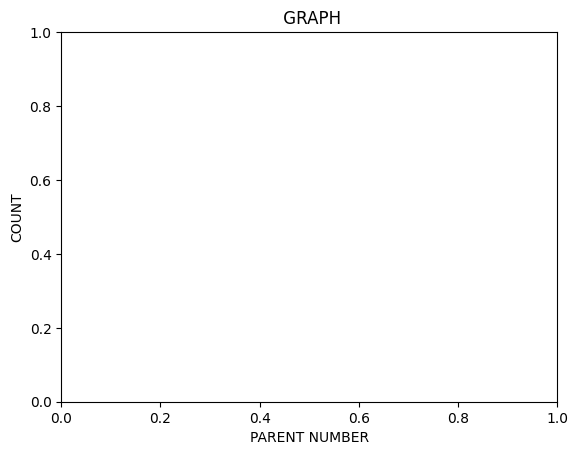

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#parent number would be on the  x-axis, percentage would be on the y-axis 
PARENTNUMBER = ['nan', '586331.0', '450730389.0', '5889993.0','7521503.0','441412723.0','5995907.0','200026573.0','238136725.0','714232249.0','433922353.0','other']
COUNT = [77818, 11939, 6814, 4397, 3574,2499,2493,2217,2105,1760,1755,40514]

#bar_labels = ['red']
#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

#ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.set_xlabel('PARENT NUMBER')
ax.set_ylabel('COUNT')
ax.set_title(' GRAPH')
#ax.legend(title='Fruit color')

plt.show()



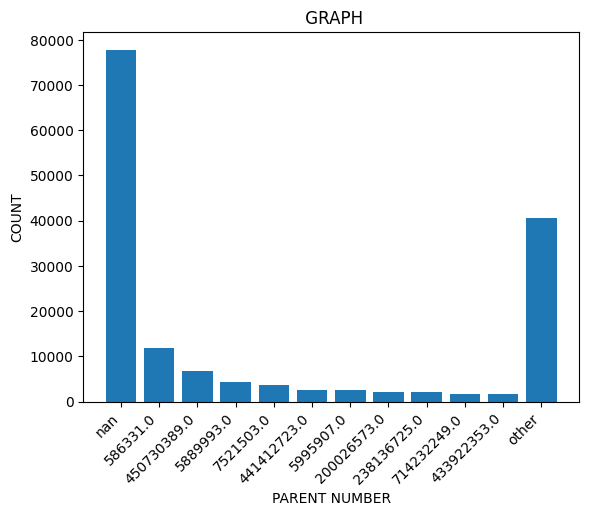

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

#parent number would be on the  x-axis, percentage would be on the y-axis 
PARENTNUMBER = ['nan', '586331.0', '450730389.0', '5889993.0','7521503.0','441412723.0','5995907.0','200026573.0','238136725.0','714232249.0','433922353.0','other']
COUNT = [77818, 11939, 6814, 4397, 3574,2499,2493,2217,2105,1760,1755,40514]

# Add the bar graph
ax.bar(PARENTNUMBER, COUNT)

ax.set_xlabel('PARENT NUMBER')
ax.set_ylabel('COUNT')
ax.set_title(' GRAPH')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


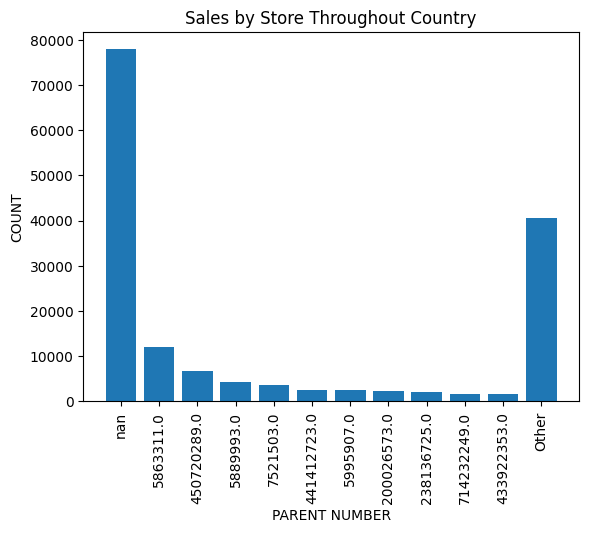

In [6]:
x = grocery_t10_22['PARENT NUMBER']
y = grocery_t10_22['COUNT']



plt.bar(x, y)
plt.xlabel('PARENT NUMBER')
plt.ylabel('COUNT')
plt.title('Sales by Store Throughout Country')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [7]:
dataset.count()

COMPANY                         203491
ADDRESS LINE 1                  203096
CITY                            203503
STATE                           203503
ZIPCODE                         203503
ZIP4                            177600
COUNTY CODE                     203478
AREA CODE                       203503
IDCODE                          203503
LOCATION EMPLOYEE SIZE CODE     156145
LOCATION SALES VOLUME CODE      151918
PRIMARY SIC CODE                203503
SIC6_DESCRIPTIONS               203503
PRIMARY NAICS CODE              199775
NAICS8 DESCRIPTIONS             199775
SIC CODE                         82559
SIC6_DESCRIPTIONS (SIC)          82517
SIC CODE 1                       44804
SIC6_DESCRIPTIONS (SIC1)         44777
SIC CODE 2                       21065
SIC6_DESCRIPTIONS(SIC2)          21053
SIC CODE 3                        7741
SIC6_DESCRIPTIONS(SIC3)           7731
SIC CODE 4                        2769
SIC6_DESCRIPTIONS(SIC4)           2763
ARCHIVE VERSION YEAR     

In [8]:
dataset_group = dataset.groupby(['COMPANY','PARENT NUMBER']).tail().count()
#dataset.drop(columns=['Unnamed: 0'])
dataset_group
#Do a bar chart to see how the market share is divided by parent company 

COMPANY                         8856
ADDRESS LINE 1                  8845
CITY                            8856
STATE                           8856
ZIPCODE                         8856
ZIP4                            7867
COUNTY CODE                     8856
AREA CODE                       8856
IDCODE                          8856
LOCATION EMPLOYEE SIZE CODE     8614
LOCATION SALES VOLUME CODE      7859
PRIMARY SIC CODE                8856
SIC6_DESCRIPTIONS               8856
PRIMARY NAICS CODE              8828
NAICS8 DESCRIPTIONS             8828
SIC CODE                        6004
SIC6_DESCRIPTIONS (SIC)         6002
SIC CODE 1                      3697
SIC6_DESCRIPTIONS (SIC1)        3693
SIC CODE 2                      1869
SIC6_DESCRIPTIONS(SIC2)         1866
SIC CODE 3                       754
SIC6_DESCRIPTIONS(SIC3)          754
SIC CODE 4                       322
SIC6_DESCRIPTIONS(SIC4)          322
ARCHIVE VERSION YEAR            8856
YELLOW PAGE CODE                4699
E

In [9]:
StateData = dataset.groupby(['STATE','PARENT NUMBER']).count()
#StateData = df[df['STATE'] == 'GA']
StateData


COMPANY  ADDRESS LINE 1  CITY  ZIPCODE  ZIP4  \
STATE PARENT NUMBER                                                 
AK    5863311.0           25              25    25       25    21   
      5889993.0            6               6     6        6     6   
      5995907.0           22              22    22       22    19   
      7521503.0           12              12    12       12    11   
      400080801.0          1               1     1        1     0   
...                      ...             ...   ...      ...   ...   
WY    850307737.0          1               1     1        1     1   
      885216069.0          2               2     2        2     1   
      886012012.0          1               1     1        1     1   
      891525875.0          3               3     3        3     3   
      905376588.0          4               4     4        4     4   

                     COUNTY CODE  AREA CODE  IDCODE  \
STATE PARENT NUMBER                                   
AK    5863311.0               25         25      25   
      5889993.0                6          6       6   
      5995907.0               22         22      22   
      7521503.0               12         12      12   
      400080801.0              1          1       1   
...                          ...        ...     ...   
WY    850307737.0              1          1       1   
      885216069.0              2          2       2   
      886012012.0              1          1       1   
      891525875.0              3          3       3   
      905376588.0              4          4       4   

                     LOCATION EMPLOYEE SIZE CODE  LOCATION SALES VOLUME CODE  \
STATE PARENT NUMBER                                                            
AK    5863311.0                               24                          24   
      5889993.0                                6                           5   
      5995907.0                               22                          22   
      7521503.0                               12                          12   
      400080801.0                              1                           1   
...                                          ...                         ...   
WY    850307737.0                              1                           1   
      885216069.0                              2                           2   
      886012012.0                              1                           1   
      891525875.0                              3                           3   
      905376588.0                              2                           2   

                     ...  POPULATION CODE  CENSUS TRACT  CENSUS BLOCK  \
STATE PARENT NUMBER  ...                                                
AK    5863311.0      ...               25            25            25   
      5889993.0      ...                6             6             6   
      5995907.0      ...               22            22            22   
      7521503.0      ...               12            12            12   
      400080801.0    ...                1             1             1   
...                  ...              ...           ...           ...   
WY    850307737.0    ...                1             1             1   
      885216069.0    ...                2             2             2   
      886012012.0    ...                1             1             1   
      891525875.0    ...                3             3             3   
      905376588.0    ...                4             4             4   

                     LATITUDE  LONGITUDE  MATCH CODE  CBSA CODE  CBSA LEVEL  \
STATE PARENT NUMBER                                                           
AK    5863311.0            25         25          25         25          21   
      5889993.0             6          6           6          6           5   
      5995907.0            22         22          22         22          14   
      7521503.0      

In [13]:
StateData = dataset.groupby(['STATE']).count()
plt.figure(figsize=(17,6))
plt.bar(StateData['STATE'],StateData['PARENTNUMBER'])
plt.title('Grocery Stores By State')
plt.xlabel('STATE')
plt.ylabel('PARENT NUMBER')
plt.show()

In [12]:
GroceryStoresInGA = StateData.groupby('COMPANY')
GroceryStoresInGA

In [11]:
#GOAL top ten employee counts throughtout the country

#Filter Grocery stores by sic (starting with 5411)
grocery_sic = stores_2022.loc[stores_2022[['PRIMARY SIC CODE', 'SIC CODE', 'SIC CODE 1', 'SIC CODE 2', 'SIC CODE 3', 'SIC CODE 4']].astype(str).apply(lambda x: x.str.startswith('5411')).any(axis=1)]
grocery_sic.head()
#Find top ten parent companies
grocery_t10_22 = grocery_sic.groupby('PARENT NUMBER', dropna=False).size().reset_index(name='COUNT')
grocery_t10_22.sort_values('COUNT', ascending=False, inplace=True)
grocery_t10_22.reset_index(drop=True,inplace=True)
# Create other row
other_row = grocery_t10_22.iloc[11:]
other_column = other_row['COUNT'].sum()
# Remove other rows
grocery_t10_22 = grocery_t10_22.iloc[:11]
grocery_t10_22.loc[len(grocery_t10_22)] = ["Other", other_column]
grocery_t10_22['PARENT NUMBER'] = grocery_t10_22['PARENT NUMBER'].astype(str)
grocery_t10_22['Percent'] = grocery_t10_22['COUNT'] / len(grocery_sic) * 100
grocery_t10_22.head(20) 

PARENT NUMBER  COUNT    Percent
0            nan  77818  49.287773
1      5863311.0  11939   7.561833
2    450720289.0   6814   4.315799
3      5889993.0   4397   2.784938
4      7521503.0   3574   2.263673
5    441412723.0   2499   1.582798
6      5995907.0   2493   1.578997
7    200026573.0   2217   1.404187
8    238136725.0   2105   1.333249
9    714232249.0   1760   1.114735
10   433922353.0   1755   1.111569
11         Other  40514  25.660449